# Load Data

In [1]:
from datasets import load_dataset

# Read dataset from hugging face
dataset = load_dataset("yelp_review_full")

print(dataset)
print(dataset["train"][0])


DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 650000
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 50000
    })
})
{'label': 4, 'text': "dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."}


# Data EDA

In [3]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = load_dataset("yelp_review_full")

train_df = dataset["train"].to_pandas()
train_df["stars"] = train_df["label"] + 1

print("Train shape:", train_df.shape)
print(train_df.head())

Train shape: (650000, 3)
   label                                               text  stars
0      4  dr. goldberg offers everything i look for in a...      5
1      1  Unfortunately, the frustration of being Dr. Go...      2
2      3  Been going to Dr. Goldberg for over 10 years. ...      4
3      3  Got a letter in the mail last week that said D...      4
4      0  I don't know what Dr. Goldberg was like before...      1


Counts per star:
stars
1    130000
2    130000
3    130000
4    130000
5    130000
Name: count, dtype: int64

Proportions per star:
stars
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: count, dtype: float64


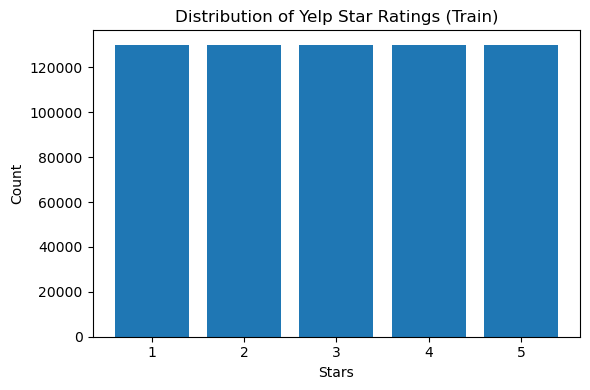

In [4]:
# Label count and ratio
label_counts = train_df["stars"].value_counts().sort_index()
label_props = label_counts / len(train_df)

print("Counts per star:")
print(label_counts)
print("\nProportions per star:")
print(label_props)

# bar plot
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index.astype(str), label_counts.values)
plt.xlabel("Stars")
plt.ylabel("Count")
plt.title("Distribution of Yelp Star Ratings (Train)")
plt.tight_layout()
plt.show()


count    650000.000000
mean        134.098089
std         121.396115
min           1.000000
25%          52.000000
50%          99.000000
75%         175.000000
max        1052.000000
Name: text_len, dtype: float64


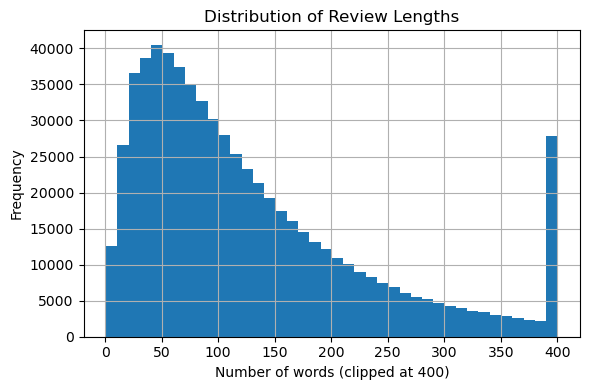

In [5]:
# text length
train_df["text_len"] = train_df["text"].str.split().str.len()

print(train_df["text_len"].describe())

plt.figure(figsize=(6, 4))
train_df["text_len"].clip(upper=400).hist(bins=40)
plt.xlabel("Number of words (clipped at 400)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.tight_layout()
plt.show()


          count        mean         std  min   25%    50%    75%     max
stars                                                                   
1      130000.0  151.469100  141.592759  1.0  57.0  108.0  196.0  1052.0
2      130000.0  152.018654  129.290066  1.0  64.0  116.0  199.0  1021.0
3      130000.0  138.626415  116.617138  1.0  59.0  107.0  182.0   973.0
4      130000.0  123.402377  107.547047  1.0  50.0   94.0  163.0  1034.0
5      130000.0  104.973900  100.742982  1.0  40.0   74.0  135.0   956.0


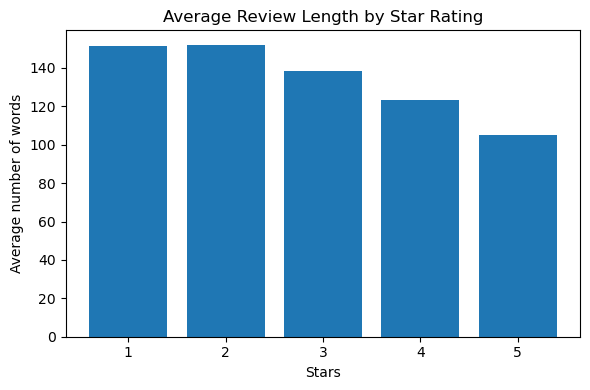

In [6]:
len_by_star = train_df.groupby("stars")["text_len"].describe()
print(len_by_star)

plt.figure(figsize=(6, 4))
mean_len = train_df.groupby("stars")["text_len"].mean()
plt.bar(mean_len.index.astype(str), mean_len.values)
plt.xlabel("Stars")
plt.ylabel("Average number of words")
plt.title("Average Review Length by Star Rating")
plt.tight_layout()
plt.show()


The Yelp Review Full training set contains 650,000 samples, evenly distributed across the five rating categories (1–5 stars), with exactly 130,000 reviews per class. This balanced label distribution ensures that our classification task does not suffer from class imbalance and allows the model to learn each rating level without bias toward any particular category.

Analysis of review length shows a right-skewed distribution: most reviews are relatively short (around 40–80 words), while a smaller number extend to several hundred words. After clipping at 400 words for visualization, we observe a long tail of extremely lengthy reviews, indicating substantial variability in how users express their opinions.

Interestingly, review length varies systematically across rating levels. Lower-star reviews tend to be longer on average, with 1-star and 2-star reviews being the most verbose. In contrast, higher-star reviews (especially 4- and 5-star) are shorter and more concise. This suggests that negative reviews often contain more detailed explanations or complaints, whereas positive feedback is expressed in fewer words. This pattern is consistent with the broader understanding that dissatisfied customers tend to provide more elaborate narratives.

Overall, the dataset is well-balanced and exhibits meaningful linguistic variation across rating categories, making it suitable for training transformer-based models for explainable rating prediction.